# Machine Learning (honestly just read Lab 4)

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


/Users/hzabriskie/Documents/Music21/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Basic linear regression

### Create data and visualize it

In [109]:
# Create X as a list of random integers between 1 and 5000
import random
k = 500 # total data points

X = []
for i in range(k):
    X.extend(random.sample(range(1, 5000), 1)) # sample without replacement
    
# Create target
Y = [(x + 34 * random.uniform(-20, 20)) * 1.72 * random.uniform(0.7, 2.6) for x in X]

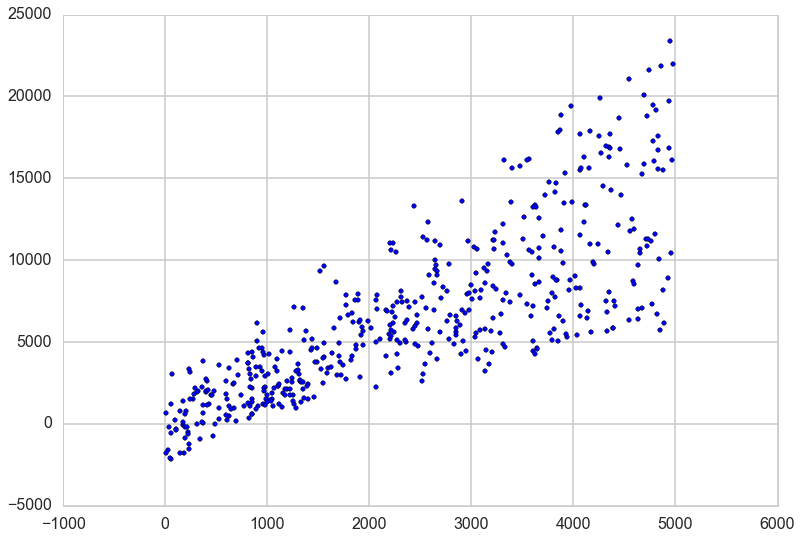

In [103]:
plt.scatter(X, Y)

(array([  30.,  101.,  103.,  109.,   56.,   37.,   25.,   25.,    9.,    5.]),
 array([ -2146.35793966,    409.4530296 ,   2965.26399886,   5521.07496812,
          8076.88593738,  10632.69690664,  13188.5078759 ,  15744.31884516,
         18300.12981442,  20855.94078368,  23411.75175294]),
 <a list of 10 Patch objects>)

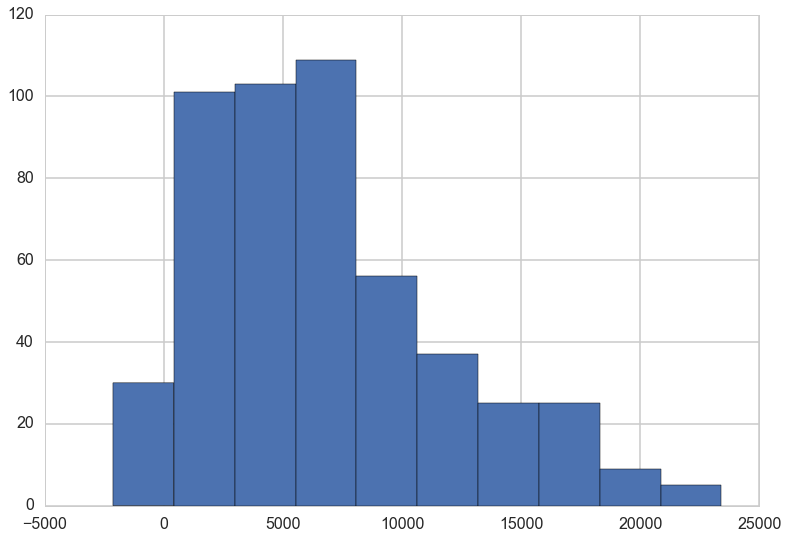

In [104]:
plt.hist(Y)

### Create a dataframe

In [105]:
basicdf = pd.DataFrame(dict(X=X, Y=Y))
basicdf.head()

,X,Y
0,3595,9058.341131
1,2061,2261.784067
2,2649,9712.604745
3,3813,5786.372452
4,3031,8100.958875


### Use seaborn to automatically fit the data

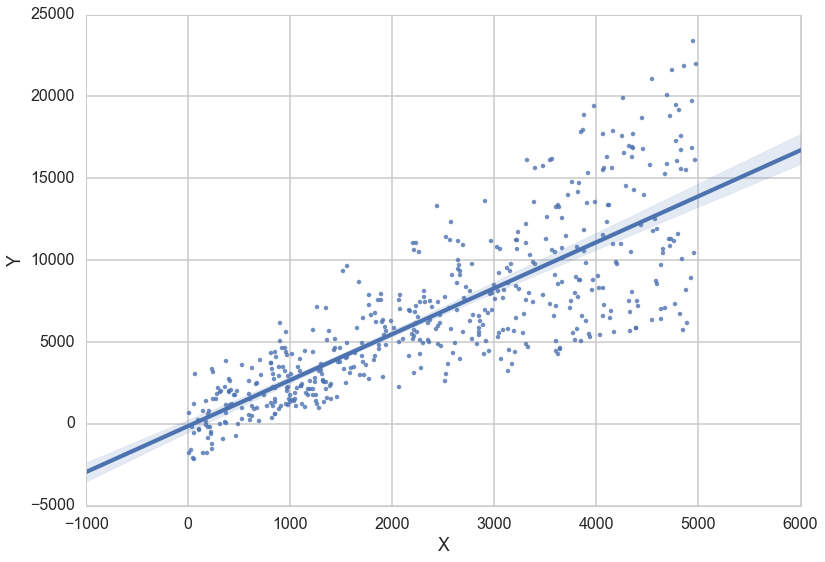

In [106]:
sns.regplot(y="Y", x="X", data=basicdf, fit_reg = True)

## Fit with statsmodels

In [107]:
# Import regression modules
# ols - Ordinary least squares, criterion for linear regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [108]:
m = ols('Y ~ X', basicdf).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     935.9
Date:                Wed, 25 Nov 2015   Prob (F-statistic):          1.91e-116
Time:                        01:36:34   Log-Likelihood:                -4708.3
No. Observations:                 500   AIC:                             9421.
Df Residuals:                     498   BIC:                             9429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -135.4497    259.038     -0.523      0.6

#### ^ Note the 2nd warning

## Create a 2nd independent target

In [111]:
Z = []
for i in range(k):
    Z.extend(random.sample(range(1, 5000), 1))
    
basicdf['Z'] = Z
basicdf.head()

,X,Y,Z
0,3595,9058.341131,3572
1,2061,2261.784067,579
2,2649,9712.604745,1910
3,3813,5786.372452,4069
4,3031,8100.958875,3770


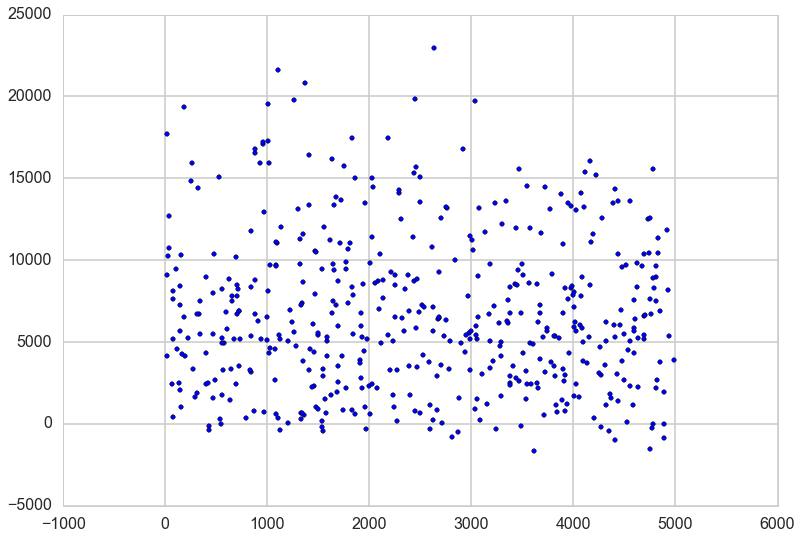

In [116]:
plt.scatter(Z, Y)